 # Churn Modelling

Context

The dataset is the details of the customers in a company.

Content

The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.

https://www.kaggle.com/datasets/shubh0799/churn-modelling/data

 ## 1. Data upload and first study

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn

In [11]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Churn Modelling/Churn_Modelling.csv.xls')

In [13]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
# Check duplicates
df.duplicated().sum()

0

In [18]:
# Delete columns "RowNumber", "CustomerId" and "Surname"
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64



 ## 2. Analysis of data

In [22]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [26]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

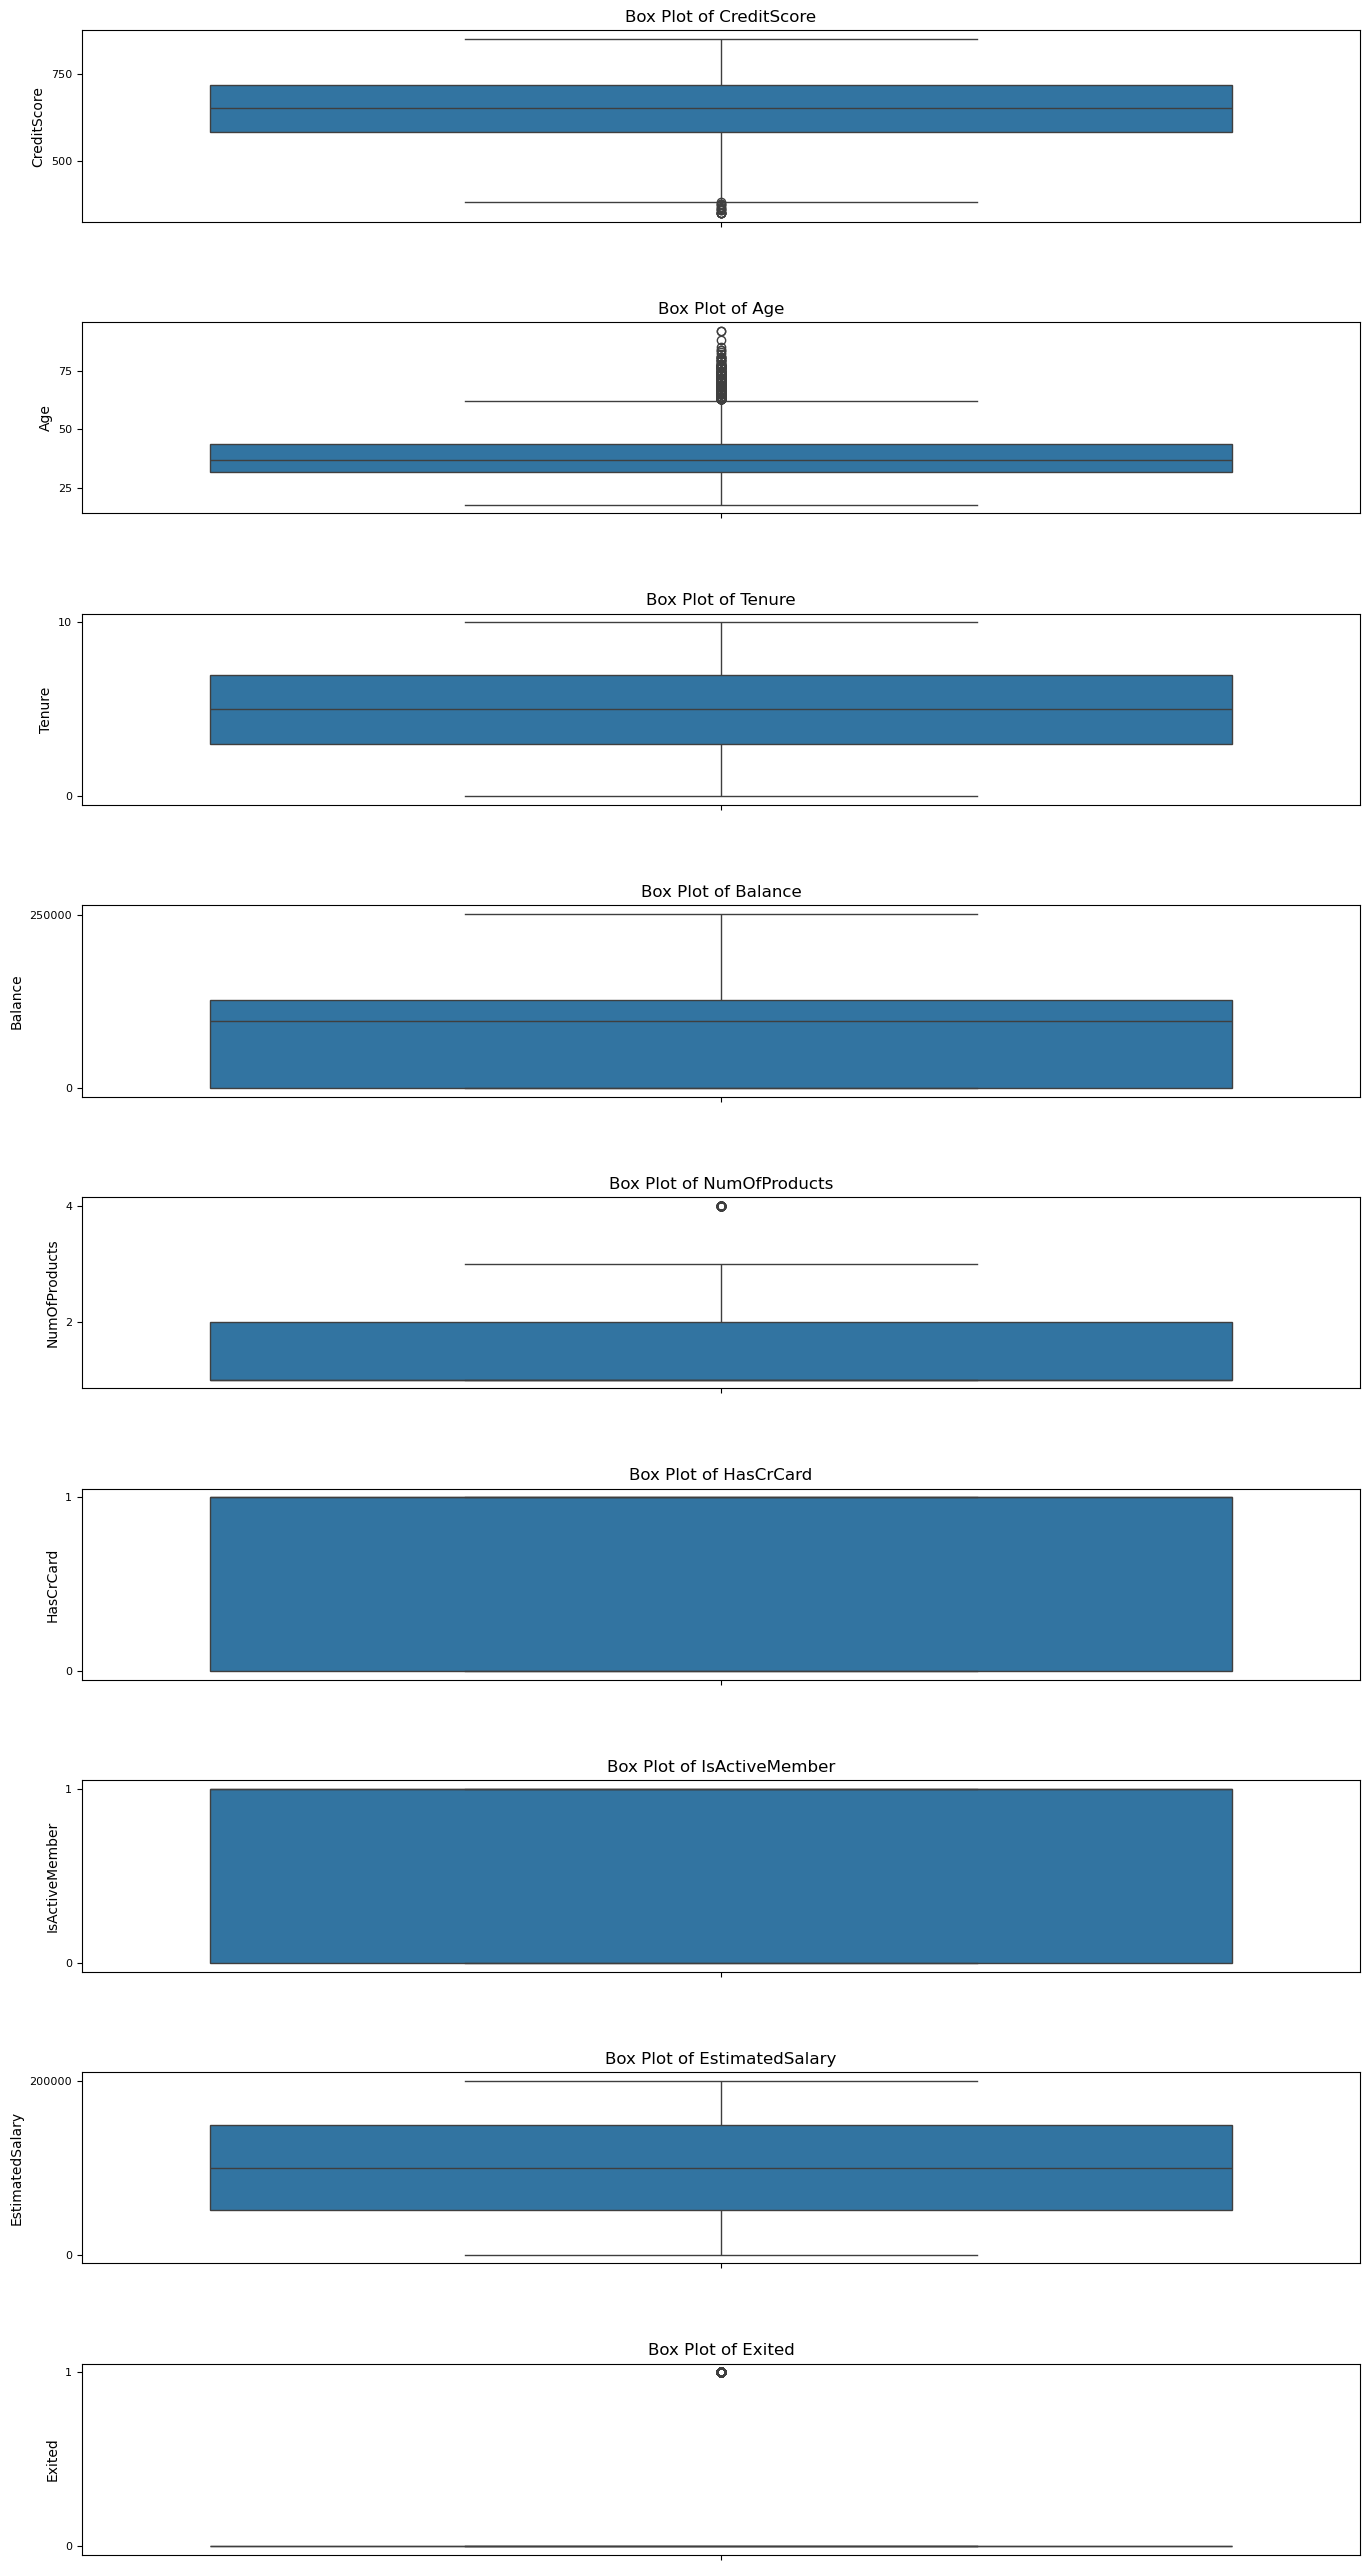

In [29]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4233/3291478919.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


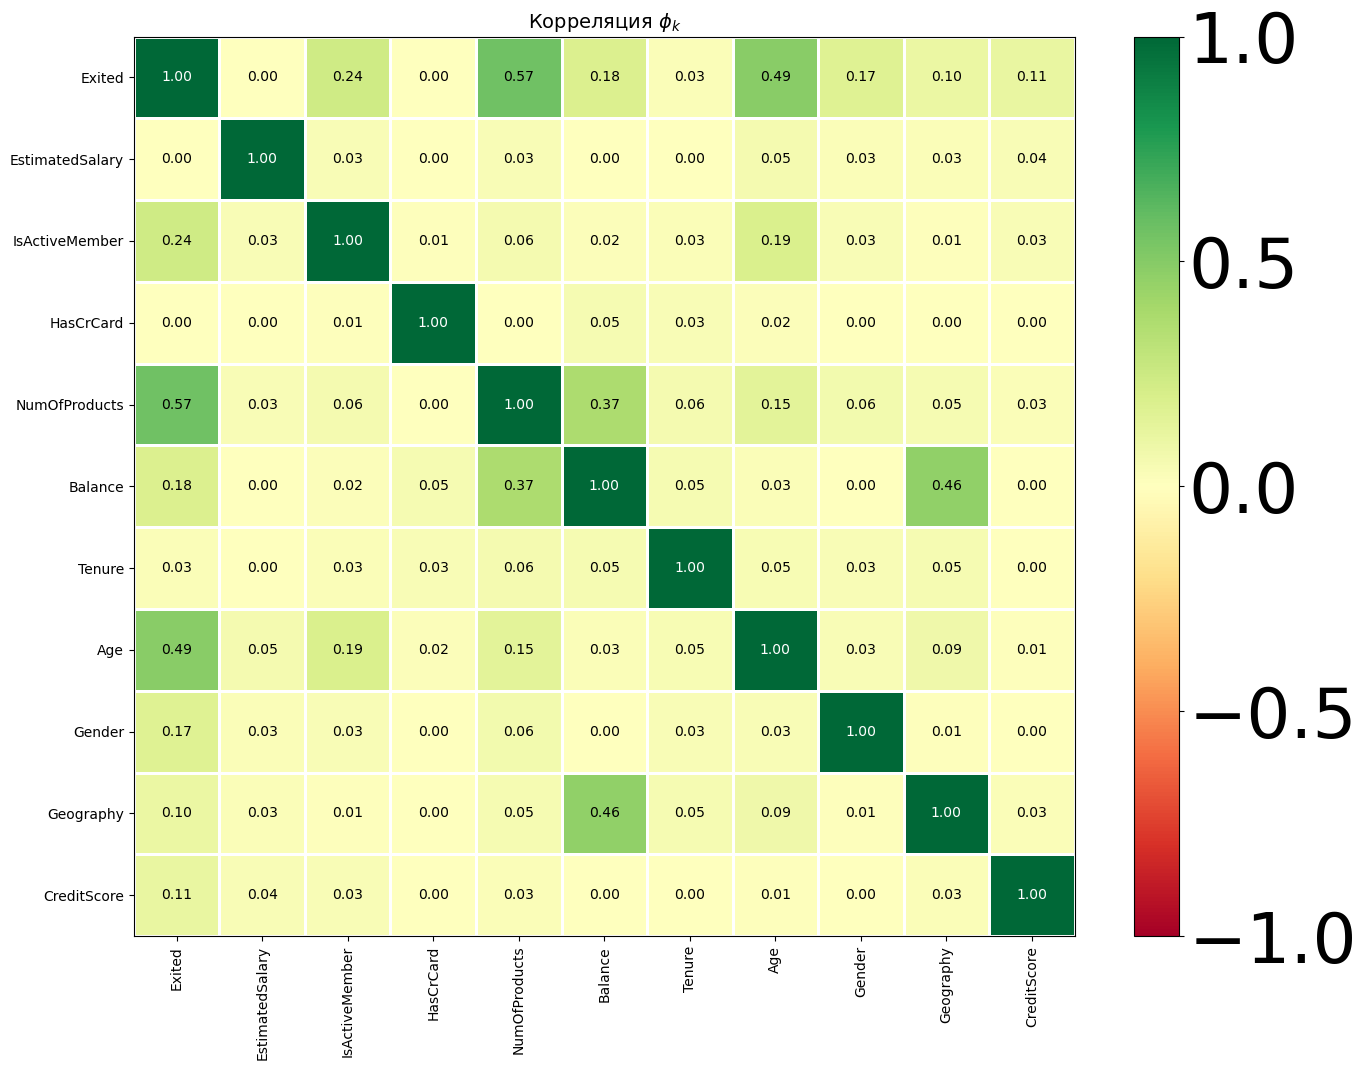

In [32]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)


 ## Data preparation

 ### Prepare numerical and categorial columns

In [40]:
# Reform categorial data
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['Exited'], axis=1)
target = df['Exited']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data Exited
0    6416
1    6324
Name: count, dtype: int64

Test data Exited
1    1639
0    1547
Name: count, dtype: int64


 #### Write the function for metrics

In [43]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [46]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.7718141870684243, 'precision': 0.7790697674418605, 'recal': 0.776693105552166, 'f1': 0.7778796211426826, 'roc': 0.771669112569231}


 #### Train DecisionTree Model

In [49]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=7
Test data {'accuracy': 0.8185812931575643, 'precision': 0.8122424955856387, 'recal': 0.8419768151311775, 'f1': 0.8268424206111444, 'roc': 0.817885627992221}


 #### Train Randomforest Model

In [52]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=9, est=10
Test data {'accuracy': 0.8336472065285625, 'precision': 0.843343653250774, 'recal': 0.8309945088468579, 'f1': 0.8371235402581438, 'roc': 0.8337260844169648}


 #### Train KNeighborsClassifier model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=1, metric=manhattan
Test data metrics: {'accuracy': 0.8138731952291274, 'precision': 0.7998853211009175, 'recal': 0.8511287370347773, 'f1': 0.8247117942654448, 'roc': 0.8127654027772464}


 #### Train XGBlassifier

In [59]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=9, est=100, learning_rate=0.2
Best F1 Score: {'accuracy': 0.8647206528562461, 'precision': 0.8669501822600243, 'recal': 0.8706528370957901, 'f1': 0.8687975646879756, 'roc': 0.864544259530442}


 #### Train LGBMregressor Model

In [64]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt') # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predictions, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 #### Train Catboost Model

In [67]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

0:	learn: 0.6665018	total: 67.7ms	remaining: 609ms
1:	learn: 0.6390916	total: 70.7ms	remaining: 283ms
2:	learn: 0.6190254	total: 72.1ms	remaining: 168ms
3:	learn: 0.6033768	total: 74ms	remaining: 111ms
4:	learn: 0.5882715	total: 79.3ms	remaining: 79.3ms
5:	learn: 0.5735892	total: 81ms	remaining: 54ms
6:	learn: 0.5618445	total: 82.4ms	remaining: 35.3ms
7:	learn: 0.5522320	total: 83.2ms	remaining: 20.8ms
8:	learn: 0.5438113	total: 83.8ms	remaining: 9.32ms
9:	learn: 0.5351340	total: 84.4ms	remaining: 0us
0:	learn: 0.6425552	total: 807us	remaining: 7.26ms
1:	learn: 0.6072060	total: 1.39ms	remaining: 5.57ms
2:	learn: 0.5798542	total: 2.05ms	remaining: 4.79ms
3:	learn: 0.5598878	total: 2.8ms	remaining: 4.2ms
4:	learn: 0.5403081	total: 3.41ms	remaining: 3.41ms
5:	learn: 0.5255886	total: 3.98ms	remaining: 2.65ms
6:	learn: 0.5138553	total: 4.78ms	remaining: 2.05ms
7:	learn: 0.5027206	total: 5.41ms	remaining: 1.35ms
8:	learn: 0.4955456	total: 6.05ms	remaining: 672us
9:	learn: 0.4853489	total: 6.

 #### Train MLPClassifier Model

In [75]:
best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

# Перебор гиперпараметров
for hidden_layer_size in [(10,), (20,), (30,)]:  # Количество нейронов в одном скрытом слое
    for learning_rate in [0.01, 0.1, 0.2]:  # Скорости обучения
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(20,), learning_rate=0.01
Test data accuracy: {'accuracy': 0.8267419962335216, 'precision': 0.8268190018039687, 'recal': 0.8389261744966443, 'f1': 0.8328285887341006, 'roc': 0.8263797000472879}


 #### And now we train a neuron network

In [114]:
# Convert features and target to Tensor 
X_train = torch.from_numpy(features_train).float()
X_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train.values).float()
y_test = torch.from_numpy(target_test.values).float()

In [116]:
len(X_train[0])

11

In [118]:
# All functions if activation
activation_functions = [nn.Tanh(), nn.Sigmoid()]

# Set amount of neurons
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 5
n_hidden_neurons_2 = 4
n_out_neurons = 1

In [120]:
# Write class for our net
class ChurnNet(nn.Module):
    def __init__(
        self, 
        n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons):
            super(ChurnNet, self).__init__()
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.act1 = nn.Tanh()
            
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
            self.act3 = nn.Sigmoid()

    def forward(self, x):
       x = self.fc1(x)
       x = self.act1(x)
       x = self.fc2(x)
       x = self.act2(x)
       x = self.fc3(x)
       x = self.act3(x)
       return x 

In [122]:
# Initialization of class
net = ChurnNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons)

In [124]:
# Initialization of weght
def init_weights(layer):
    if type(layer) == nn.Linear: 
        nn.init.xavier_normal_(layer.weight)

net.apply(init_weights)

ChurnNet(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=4, out_features=1, bias=True)
  (act3): Sigmoid()
)

In [126]:
# Optimizer and loss function

torch.manual_seed(42)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = nn.BCELoss()

In [128]:
# Train net
save_dir = '/Users/macbook/Desktop/ForGit/Churn_Modelling/'

def train_skynet(num_epochs):
    result = {}

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        preds = net.forward(X_train).flatten()

        loss_value = loss(preds, y_train)
    
        loss_value.backward()

        optimizer.step()

        if epoch % 1000 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test).flatten()
            metrics = 100 - (loss_value * 100).item()
            print('Epoch:', epoch)
            print('The accuracy of predictions in the test:', metrics)
            result[epoch] = metrics
    torch.save(net.state_dict(), os.path.join(save_dir, 'model_weights_rain.pth'))
    return result, test_preds

result, predictions = train_skynet(14001)

Epoch: 0
The accuracy of predictions in the test: 14.368446350097656
Epoch: 1000
The accuracy of predictions in the test: 57.78004455566406
Epoch: 2000
The accuracy of predictions in the test: 60.991878509521484
Epoch: 3000
The accuracy of predictions in the test: 61.685089111328125
Epoch: 4000
The accuracy of predictions in the test: 62.35363006591797
Epoch: 5000
The accuracy of predictions in the test: 63.2318229675293
Epoch: 6000
The accuracy of predictions in the test: 63.41328048706055
Epoch: 7000
The accuracy of predictions in the test: 63.6426887512207
Epoch: 8000
The accuracy of predictions in the test: 64.00122833251953
Epoch: 9000
The accuracy of predictions in the test: 64.12015914916992
Epoch: 10000
The accuracy of predictions in the test: 64.1942138671875
Epoch: 11000
The accuracy of predictions in the test: 64.23290252685547
Epoch: 12000
The accuracy of predictions in the test: 64.2529067993164
Epoch: 13000
The accuracy of predictions in the test: 64.26128768920898
Epoch:

 #### Change number of neurons for improvement of quality

In [106]:
def neurons_test(n_hidden_neurons_1):
    neurons_test_dict = []

    for i in range(n_hidden_neurons_1, 4, -1):
        for j in range(i, 2, -1):
            
            net = ChurnNet(X_train.shape[1], i, j, 1)
        
            net.apply(init_weights)

            optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
            loss = nn.MSELoss()
        
            result, predictions = train_skynet(14001)
            neurons_test_dict.append([X_train.shape[1], i, j, 1, min(result, key=result.get), min(result.values())])

            result = {}
            #print(neurons_test_dict)
    return neurons_test_dict

In [108]:
res = neurons_test(10)

Epoch: 0
The accuracy of predictions in the test: 63.87822723388672
Epoch: 1000
The accuracy of predictions in the test: 63.878353118896484
Epoch: 2000
The accuracy of predictions in the test: 63.879825592041016
Epoch: 3000
The accuracy of predictions in the test: 63.881874084472656
Epoch: 4000
The accuracy of predictions in the test: 63.88233184814453
Epoch: 5000
The accuracy of predictions in the test: 63.88412094116211
Epoch: 6000
The accuracy of predictions in the test: 64.2347526550293
Epoch: 7000
The accuracy of predictions in the test: 64.26701736450195
Epoch: 8000
The accuracy of predictions in the test: 64.41818618774414
Epoch: 9000
The accuracy of predictions in the test: 64.46619415283203
Epoch: 10000
The accuracy of predictions in the test: 64.51878356933594
Epoch: 11000
The accuracy of predictions in the test: 64.51988983154297
Epoch: 12000
The accuracy of predictions in the test: 64.52003479003906
Epoch: 13000
The accuracy of predictions in the test: 64.52013397216797
Epo

In [109]:
res_df = pd.DataFrame(res, columns=['Входной слой', 'Слой 1', 'Слой 2', 'Выходной слой', 'Эпоха', 'BCE'])

In [110]:
res_df = res_df.sort_values(by='BCE', ascending=False)
res_df

,Входной слой,Слой 1,Слой 2,Выходной слой,Эпоха,BCE
31,11,5,4,1,11000,64.521328
26,11,6,6,1,5000,64.521305
18,11,8,5,1,0,64.521305
28,11,6,4,1,5000,64.521301
17,11,8,6,1,4000,64.521301
14,11,9,3,1,5000,64.521297
32,11,5,3,1,1000,64.521252
12,11,9,5,1,13000,64.521252
30,11,5,5,1,2000,64.521252
27,11,6,5,1,14000,64.521236


In [132]:
# Receive a prediction from trained model
net = ChurnNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_out_neurons)
net.load_state_dict(torch.load('/Users/macbook/Desktop/ForGit/Churn_Modelling/model_weights_rain.pth'))
net.eval() 
prediction = net.forward(X_test)

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4233/1546487536.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('/Users/macbook

In [134]:
# Transformation of probability to a binary predictions
threshold = 0.5
y_pred = [1 if prob >= threshold else 0 for prob in prediction]

# Receive a metrics
neuronet = metrics(y_pred, target_test)
neuronet

{'accuracy': 0.8327055869428751,
 'precision': 0.8443337484433375,
 'recal': 0.8273337400854179,
 'f1': 0.8357473035439137,
 'roc': 0.8328653186529222}

 ## Conclusion

In [136]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, neuronet, xgb, knn, mlp_model]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'NeuroNet', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
LGBM                  0.864721   0.866950  0.870653  0.868798  0.864544
CatBoost              0.864721   0.866950  0.870653  0.868798  0.864544
XGBClassifier         0.864721   0.866950  0.870653  0.868798  0.864544
RandomForest          0.833647   0.843344  0.830995  0.837124  0.833726
NeuroNet              0.832706   0.844334  0.827334  0.835747  0.832865
MLPClassifier         0.826742   0.826819  0.838926  0.832829  0.826380
DecisionTree          0.818581   0.812242  0.841977  0.826842  0.817886
KNeighborsClassifier  0.813873   0.799885  0.851129  0.824712  0.812765
LogisticRegression    0.771814   0.779070  0.776693  0.777880  0.771669
